<a href="https://colab.research.google.com/github/Dharil33/PCA-With-Supervised-Learning-Classifier/blob/main/PCA_with_Supervised_Learning_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop('Unnamed: 32',axis = 1, inplace = True)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
X = df.drop('diagnosis',axis = 1)
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = df.iloc[:,1]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Support Vector Machine (SVM)**

Before applying PCA

In [ ]:
from sklearn.svm import SVC
sm = SVC()

In [ ]:
sm.fit(X_train,y_train)

SVC()

In [ ]:
import time
start = time.time()
y_pred = sm.predict(X_test)
print(time.time()-start)

0.009785890579223633


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test,y_pred)
acc

0.5877192982456141

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.59      1.00      0.74        67
           M       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Visualization Before Applying PCA**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


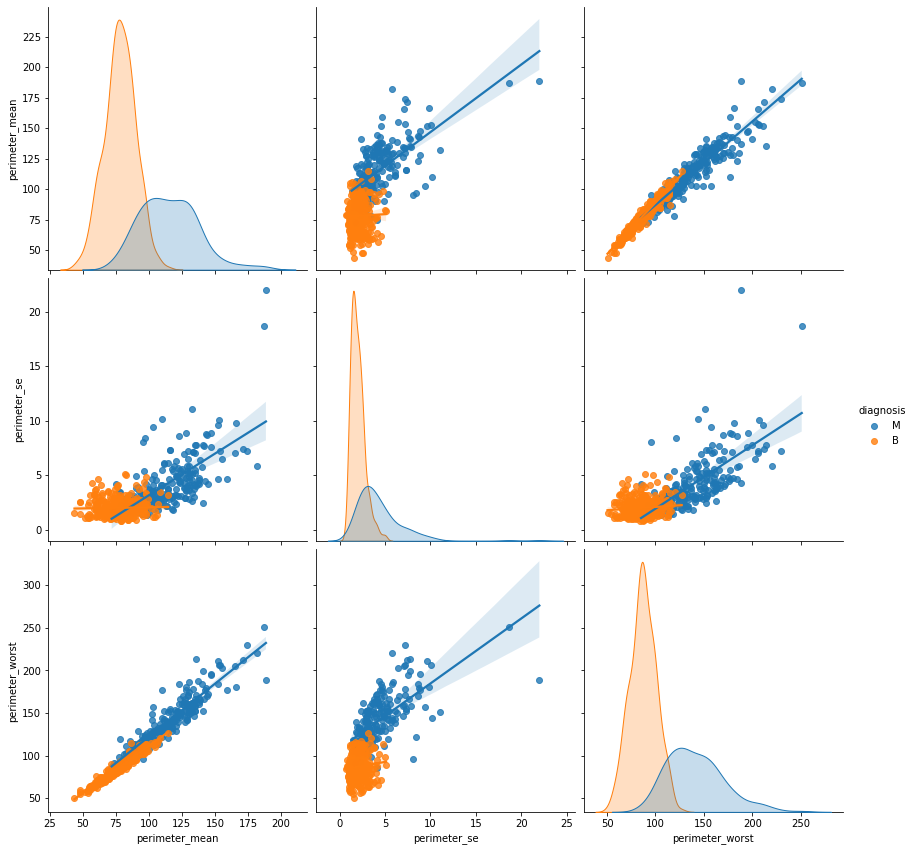

In [ ]:
perimeter = df[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis', size = 4, kind="reg")

**Applying Principal Component Analysis (PCA)**


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(455, 31)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)

In [ ]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(455, 15)

In [ ]:
X_train

array([[-3.04383526,  1.10930642,  0.40747241, ..., -0.53622782,
        -0.34271184,  0.19637803],
       [-2.28680581,  0.40471059,  0.25987741, ..., -0.5087879 ,
        -0.27073495,  0.26129669],
       [-1.0882658 , -1.98296251, -1.22061763, ...,  0.12599413,
         0.18615466,  0.10752884],
       ...,
       [-3.01429089,  0.22083396,  1.00297715, ...,  0.72985548,
         0.22092281, -0.38890756],
       [-5.61373724, -0.54206973,  4.11039214, ..., -1.7023544 ,
        -0.24890969, -0.93887038],
       [-1.02153198,  1.39956631,  1.33522744, ..., -0.60846567,
        -0.01124463, -0.28125727]])

**Applying Support Vector Machine (SVM) after PCA**

In [ ]:
sm.fit(X_train,y_train)

SVC()

In [ ]:
start = time.time()
y_pred = sm.predict(X_test)
print(time.time()-start)

0.0030465126037597656


In [ ]:
acc = accuracy_score(y_test,y_pred)
acc

0.9736842105263158

In [ ]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
512,M,M
457,B,B
439,B,B
298,B,B
37,B,B
...,...,...
213,M,M
519,B,B
432,M,M
516,M,M


In [ ]:
pca_df = pd.DataFrame({'X' : X_train[:,0],'Y' : X_train[:,1],'classification' : y_train})

In [ ]:
pca_df.head()

,X,Y,classification
338,-3.043835,1.109306,B
427,-2.286806,0.404711,B
406,-1.088266,-1.982963,B
96,-2.565492,0.183511,B
490,-2.835862,-1.041556,B


**2D Plot Visualization after applying PCA**

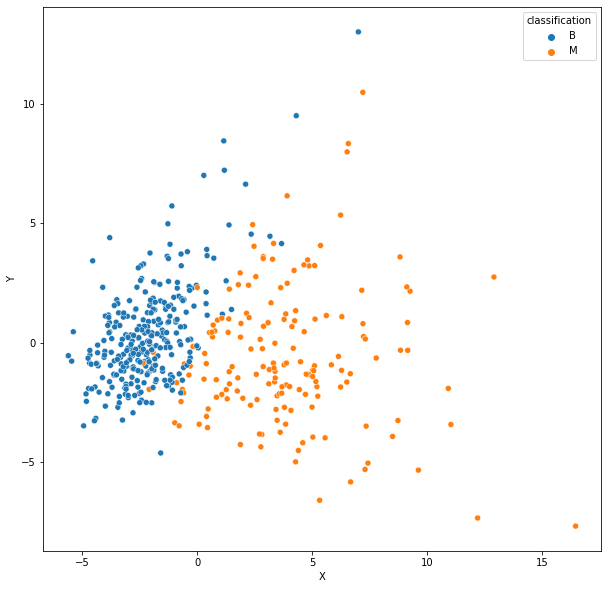

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'X', y = 'Y', hue = 'classification', legend = 'full', data = pca_df)
plt.show()

**3D Visualization after applying PCA**

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype('str')
fig = px.scatter_3d(df,x = X_train[:,0],y = X_train[:,1],z = X_train[:,2],color = y_train_trf)
fig.update_layout(margin = dict(l = 20,r=20,t=20,b=20))
fig.show()

**Hyperparamter Tuning for Support Vector Machine**

In [ ]:
#Hyperparameter Tuning for Support Vector Machine
for i in range(1,15):
  pca = PCA(n_components = i)

  X_train_ht = pca.fit_transform(X_train)
  X_test_ht = pca.transform(X_test)

  sm = SVC()
  sm.fit(X_train_ht,y_train)
  start = time.time()
  y_pred_ht = sm.predict(X_test_ht)
  print("Time taken:",time.time()-start)

  print("Accuracy:",accuracy_score(y_test,y_pred_ht))

Time taken: 0.0009167194366455078
Accuracy: 0.9035087719298246
Time taken: 0.0007610321044921875
Accuracy: 0.8947368421052632
Time taken: 0.0007808208465576172
Accuracy: 0.9122807017543859
Time taken: 0.0007636547088623047
Accuracy: 0.9298245614035088
Time taken: 0.0007808208465576172
Accuracy: 0.956140350877193
Time taken: 0.0008471012115478516
Accuracy: 0.9649122807017544
Time taken: 0.0008895397186279297
Accuracy: 0.9649122807017544
Time taken: 0.0009262561798095703
Accuracy: 0.9649122807017544
Time taken: 0.0009315013885498047
Accuracy: 0.9649122807017544
Time taken: 0.0009582042694091797
Accuracy: 0.9824561403508771
Time taken: 0.0009937286376953125
Accuracy: 0.9824561403508771
Time taken: 0.0009911060333251953
Accuracy: 0.9824561403508771
Time taken: 0.0011358261108398438
Accuracy: 0.9824561403508771
Time taken: 0.0010995864868164062
Accuracy: 0.9736842105263158


**Hyperpameter Tuning For Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Hyperparameter Tuning for Logistic Regression
for i in range(1,15):
  pca = PCA(n_components = i)

  X_train_ht = pca.fit_transform(X_train)
  X_test_ht = pca.transform(X_test)

  lr = LogisticRegression()
  lr.fit(X_train_ht,y_train)
  y_pred_ht = lr.predict(X_test_ht)

  print(accuracy_score(y_test,y_pred_ht))

0.9035087719298246
0.9210526315789473
0.9210526315789473
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9385964912280702
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[66  1]
 [ 2 45]]


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print("classification Report:",classification_report(y_test,y_pred))

classification Report:               precision    recall  f1-score   support

           B       0.97      0.99      0.98        67
           M       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

